<div style="text-align:center">
<img src="img/intro_correspondre.png">
</div>


*** CREATION IN PROGRESS ***<br>
Notebook created by GITHUB ESTELLE DERRIEN

## Summary

27. <b> Modeling a shortest path problem  </b>
    - Abstract
    - Mathematical modeling
    - Python Pulp or Cplex solution
28. <b> Modeling a chemistry combinatorial optimization  </b>
    - Abstract of the Mac Graw Book problem BOILER/TURBO-GENERATOR SYSTEM
    - Mathematical modeling
    - Python Pulp or Cplex solution
29. <b> Modeling a petroleum combinatorial optimization </b>
    - Abstract and Kirchhoff constraints
    - Mathematical modeling
    - Python Pulp or Cplex solution
30. <b> Modeling of a multiple objectives problem</b>
    - Abstract of https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/
    - Mathematical modeling
    - Python Pulp or Cplex solution
31. <b> Getting familiar with sensitivity analysis</b>
    - Displaying Reduced costs
    - Displaying The Shadow Price
    - Displaying Slacks variables
32. <b> Getting familiar with variables relaxations</b>

33. <b> Linearizations </b>
    - Linearization technics using the AIMMS modeling guide and Ling-Chieh Kung technics
    - Objective linearizations
    - Constraints linearizations
    - Examples using Python solvers


33. <b> Apendix </b> 
- Importing a data instance from an Excel file
- Importing a data instance from a Database

# <b>27.  Modeling a shortest path problem  </b>

<div style="text-align:center">
<img src="img/highway.webp" width="500"/>
</div>

## <b>27.1 Abstract </b>

The shortest path problem is the problem of finding a path between two vertices (or nodes) in a graph such that the sum of the weights of its constituent edges is minimized.

## <b>27.2 Instance </b>

<div style="text-align:center">
<img src="img/sp.png" width="500"/>
</div>

Link : https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html

## <b>27.4 NetworkX Djikstra Solution </b>


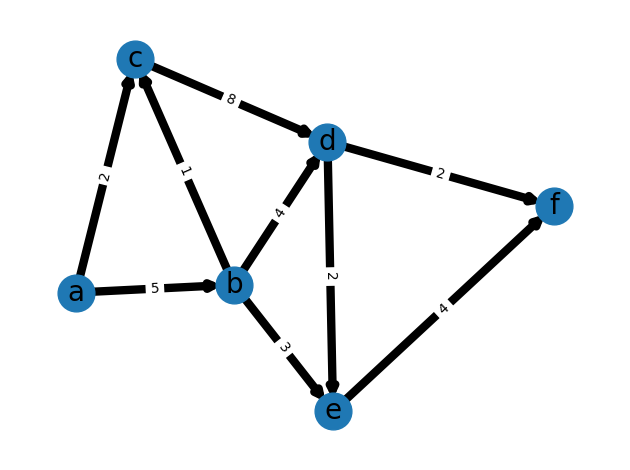

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_edge("a", "b", weight=5,pos=(1,1))
G.add_edge("a", "c", weight=2)
G.add_edge("b", "c", weight=1,pos=(1,2))
G.add_edge("b", "d", weight=4)
G.add_edge("b", "e", weight=3)
G.add_edge("c", "d", weight=8)
G.add_edge("d", "e", weight=2)
G.add_edge("d", "f", weight=2)
G.add_edge("e", "f", weight=4)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=2)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [2]:
print("Path to follow")
nx.dijkstra_path(G, "a", "f")

Path to follow


['a', 'b', 'd', 'f']

In [3]:
print("Minimal Distance")
nx.dijkstra_path_length(G, "a", "f")

Minimal Distance


11

## <b>27.5 Python Pulp compact solution </b>

Testing the https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html code :

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [4]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------

N = ['A', 'B', 'C', 'D', 'E', 'F']

C = {'A': {'B': 5, 'C': 2}, 
     'B': {'C': 1, 'D': 4, 'E': 3}, 
     'C': {'D': 8}, 
     'D': {'E': 2, 'F': 2}, 
     'E': {'F': 4}}

# -----------------------------------
# All of the links from i to j possibilities
# -----------------------------------
# Meaning : node value is 1 if it's the first node, and -1 if F (last node)
D = {node: 1 if node == 'A' else -1 if node == 'F' else 0 for node in N}

# As soon as an xij variable is involved in the math model, 
# this coding strategy is used to model all of the possibilities.
# then, all of the possibilities becomes decisions variables, under the "decisions variables " part
E = [(i,j) for i in N for j in N if i in C.keys() if j in C[i].keys()]

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts('x', E,  lowBound = 0, upBound = 1, cat = LpInteger)

# -----------------------------------
# Math model 
# -----------------------------------

# objective
prob += lpSum([C[i][j]*x[i,j] for (i,j) in E])

# constraints
for i in N:
    prob += (lpSum([x[i,j] for j in N if (i,j) in E]) - lpSum([x[k,i] for k in N if (k,i) in E])) == D[i]

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    print(v.name, '=', v.varValue)

ModuleNotFoundError: No module named 'pulp'

## <b> 27.6 Hard coded Youtube example and instance</b>

Let's observe and recreate this hard coded version in Pulp , for a better understanding :

Link:
https://www.youtube.com/watch?v=7uCx--vUiiI

<div style="text-align:center">
<img src="img/sp2.png" >
</div>
Find the shortest path between Chicago and node 6 .


<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's start with a naïve try , picking all of the shortest nodes routes

In [ ]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *


# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Recreating all xij roads possibilities, it's supra boring by hand.
# simply look at the graph to recreate the decisions variables.

# Node 1
X12 = pulp.LpVariable('X12', lowBound=0, cat='Binary')
X13 = pulp.LpVariable('X13', lowBound=0, cat='Binary')
X14 = pulp.LpVariable('X14', lowBound=0, cat='Binary')

# Node 2
X23 = pulp.LpVariable('X23', lowBound=0, cat='Binary')
X25 = pulp.LpVariable('X25', lowBound=0, cat='Binary')

# Node 3
X32 = pulp.LpVariable('X32', lowBound=0, cat='Binary')
X34 = pulp.LpVariable('X34', lowBound=0, cat='Binary')
X35 = pulp.LpVariable('X35', lowBound=0, cat='Binary')
X36 = pulp.LpVariable('X36', lowBound=0, cat='Binary')

# Node 4
X43 = pulp.LpVariable('X43', lowBound=0, cat='Binary')
X47 = pulp.LpVariable('X47', lowBound=0, cat='Binary')

# Node 5
X52 = pulp.LpVariable('X52', lowBound=0, cat='Binary')
X53 = pulp.LpVariable('X53', lowBound=0, cat='Binary')
X56 = pulp.LpVariable('X56', lowBound=0, cat='Binary')
X57 = pulp.LpVariable('X57', lowBound=0, cat='Binary')

# Node 6
X74 = pulp.LpVariable('X74', lowBound=0, cat='Binary')
X75 = pulp.LpVariable('X75', lowBound=0, cat='Binary')
X76 = pulp.LpVariable('X76', lowBound=0, cat='Binary')

# -----------------------------------
# Math model 
# -----------------------------------

# Objective
# Find the shortest path = minimizing roads distances
prob += 35 * X12 + 30 * X13 + 20 * X14 + 8 * X23 + 12 * X25 + 8 * X32 + 9 * X34 + 10 * X35 + 20 * X36  
9 * X43 + 15 * X47 + 12 * X52 + 10 * X53 + 5 * X56 + 20 * X57 + 15 * X74 + 20 * X75 + 5 * X76

# Constraints
# Only one road picked per node
prob += X12 + X13 + X14 == 1
prob += X23 + X25  == 1
prob += X32 + X34 + X35 + X36  == 1
prob += X43 + X47   == 1
prob += X52 + X53 + X56 + X57   == 1
prob += X74 + X75 + X76  == 1

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)



STATUS
Optimal

SOLUTION
X14 = 1.0
X23 = 1.0
X32 = 1.0
X43 = 1.0
X57 = 1.0
X76 = 1.0


Ok, in this front code, some logic is missing, we obtain each of the shortest node paths but it make no sense for finding the shortest path .
Let see how the constraints coding differs in this next coding part, path solution is correct, but the objective is 20, while it should be 40, don't know why yet, It's strange :

In [ ]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *


# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Recreating all xij roads possibilities, it's supra boring by hand.
# simply look at the graph to recreate the decisions variables.

# Node 1
X12 = pulp.LpVariable('X12', lowBound=0, cat='Binary')
X13 = pulp.LpVariable('X13', lowBound=0, cat='Binary')
X14 = pulp.LpVariable('X14', lowBound=0, cat='Binary')

# Node 2
X23 = pulp.LpVariable('X23', lowBound=0, cat='Binary')
X25 = pulp.LpVariable('X25', lowBound=0, cat='Binary')

# Node 3
X32 = pulp.LpVariable('X32', lowBound=0, cat='Binary')
X34 = pulp.LpVariable('X34', lowBound=0, cat='Binary')
X35 = pulp.LpVariable('X35', lowBound=0, cat='Binary')
X36 = pulp.LpVariable('X36', lowBound=0, cat='Binary')

# Node 4
X43 = pulp.LpVariable('X43', lowBound=0, cat='Binary')
X47 = pulp.LpVariable('X47', lowBound=0, cat='Binary')

# Node 5
X52 = pulp.LpVariable('X52', lowBound=0, cat='Binary')
X53 = pulp.LpVariable('X53', lowBound=0, cat='Binary')
X56 = pulp.LpVariable('X56', lowBound=0, cat='Binary')
X57 = pulp.LpVariable('X57', lowBound=0, cat='Binary')

# Node 6
X74 = pulp.LpVariable('X74', lowBound=0, cat='Binary')
X75 = pulp.LpVariable('X75', lowBound=0, cat='Binary')
X76 = pulp.LpVariable('X76', lowBound=0, cat='Binary')

# -----------------------------------
# Math model 
# -----------------------------------

# Objective
# Find the shortest path = minimizing roads distances
prob += 35 * X12 + 30 * X13 + 20 * X14 + 8 * X23 + 12 * X25 + 8 * X32 + 9 * X34 + 10 * X35 + 20 * X36  
9 * X43 + 15 * X47 + 12 * X52 + 10 * X53 + 5 * X56 + 20 * X57 + 15 * X74 + 20 * X75 + 5 * X76

# Constraints
# Only one road picked per node
prob += X12 + X13 + X14 == 1 # Node 1 Chicago 

prob += X23 + X25  == X12 + X32 + X52
prob += X32 + X34 + X35 + X36  == X13 + X23 + X43 + X53
prob += X43 + X47   == X14 + X34 + X74 
prob += X52 + X53 + X56 + X57  == X25 + X35 + X75 
prob += X74 + X75 + X76  == X47 + X57

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')

for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)
print("Minimized path = ", value(prob.objective))

STATUS
Optimal

SOLUTION
X14 = 1.0
X47 = 1.0
X76 = 1.0
Minimized path =  20.0


We see that the python pulp path [{1-4},{4-7},{7-6}] is the same than the online business analytics youtube channel,looking good, bro.


<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
<div style="text-align:center">
<img src="img/spath2.png" width="500"/>
</div>

But I did not answer about " How theses strange constraints do works " ?
To answer that, we need to <b>link</b> the Shortest path LP <b>Math model</b> to this python pulp code, so, variables need to be stricly the same, this is the only way to really <b> step up</b> my level, and to be able to manage more optimizations later .
After that, we'll be able to RECODE this python pulp code as a <b>COMPACT MODEL</b>, just like in chapter 27.5, and make them perfectly match together.

## <b>Shortest Path LP Math model</b>

Let's first observe some maths models found on the internet : 

Bernard Lidicky Version :
https://lidicky.name/oldteaching/18.566/l13%20-%20Shortest%20Path%20and%20Linear%20Programming.pdf

<div style="text-align:center">
<img src="img/spmathmodel.png" width="500"/>
</div>

courses.ie.bilkent.edu.tr version :
https://courses.ie.bilkent.edu.tr/ie400/wp-content/uploads/sites/8/2017/09/Lecture8.pdf

<div style="text-align:center">
<img src="img/spmathmodel2.png" width="500"/>
</div>

The bilkent.edu model clearly looks like the code I've found in my chapter 27.5.
Let's match them variables names exactly, now, and keep the values found at chapter 27.6, will the solution be the same ? :

Instance reminder : Find the shortest path between node 1 (Chicago) and node 6
<div style="text-align:center">
<img src="img/sp2.png" >
</div>

Python pulp code, like the bilken math model

In [ ]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------

# Node list
N = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6','X7']

# Roads costs or length
C = {'X1': {'X2': 35, 'X3': 20 , 'X4': 8 }, 
     'X2': {'X3': 12, 'X5': 8},
     'X3': {'X2': 8,'X4': 9,'X5': 10,'X6': 20,}, 
     'X4': {'X3': 9, 'X7': 15 }, 
     'X5': {'X2': 12, 'X3': 10, 'X6': 5, 'X7': 20},
     'X6': {'X3': 20, 'X5': 5,'X7': 5},
     'X7': {'X5': 20, 'X6': 5}     
     }

# -----------------------------------
# All of the links from i to j possibilities
# -----------------------------------
# Meaning : node value is 1 if it's the first node, and -1 if F (last node)
# Define starting and ending nodes:
D = {node: 1 if node == 'X1' else -1 if node == 'X6' else 0 for node in N}

# As soon as an xij variable is involved in the math model, 
# this coding strategy is used to model all of the possibilities.
# then, all of the possibilities becomes decisions variables, under the "decisions variables " part
E = [(i,j) for i in N for j in N if i in C.keys() if j in C[i].keys()]

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts('x', E,  lowBound = 0, upBound = 1, cat = LpInteger)

# -----------------------------------
# Math model 
# -----------------------------------

# objective
prob += lpSum([C[i][j]*x[i,j] for (i,j) in E])

# constraints
for i in N:
    prob += (lpSum([x[i,j] for j in N if (i,j) in E]) - lpSum([x[k,i] for k in N if (k,i) in E])) == D[i]

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)

<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\gloup\AppData\Local\Temp\ipykernel_7544\3718423575.py:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  D = {node: 1 if node is 'X1' else -1 if node is 'X6' else 0 for node in N}
C:\Users\gloup\AppData\Local\Temp\ipykernel_7544\3718423575.py:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  D = {node: 1 if node is 'X1' else -1 if node is 'X6' else 0 for node in N}


STATUS
Optimal

SOLUTION
x_('X1',_'X4') = 1.0
x_('X4',_'X7') = 1.0
x_('X7',_'X6') = 1.0


We see that the python pulp path [{1-4},{4-7},{7-6}] is the same than the online business analytics youtube channel,looking good, bro, and now, we can make the link between the math model, and the python pulp code with ease, cool , bro.


<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

## <b> 31. Getting familiar with sensitivity analysis</b>

Best link :
https://www.eit.lth.se/fileadmin/eit/courses/eitn95/2018/Labs_assignments/Sensitivity_Analysis_in_Excel.pdf

Awareness analysis allows you to know to what extent you can change the parameters of the solution provided. This allows decision -makers to assess if it is worth increasing the inventory, for example.

- Reduced costs:

Reduced costs tell us how much the coefficients of the objective function (unit profits) can be increased or decreased before the optimal solution changes. Example: "If we increase the unit profit of children's seats with 20 or more units, the optimal value will change"

- The Shadow Price:

The Shadow Price or "Fictive Price" in French tells us how much the optimal solution can be increased or decreased if we modify the available resources in a single unit.
 Or 
The fictitious price measures the variation in the value of the objective function per unit of increase in the limit of constraint.

- Slacks:

The quantity of a resource that is not used. Let us know how many resources are "wasted" or "unused". When you have inventory constraints, these values ​​allow you to know the amount of unused inventory.

## <b>Displaying sensitivity analysis with Python Pulp</b>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's display the slacks and shadow price in this agricultural example done by me :

Looking at the results, we see that an amount of 16 food units is wasted , while doing the optimization.

There is no shadow price .

In [ ]:
# Good link : https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chapter4.pdf

# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p 
import pandas as pd

# -----------------------------------
# Type of problem
# -----------------------------------
problem = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# -----------------------------------
# Decisions variables
# -----------------------------------
pet1 = p.LpVariable("pet1", 0, None, p.LpInteger)   
pet2 = p.LpVariable("pet2", 0, None, p.LpInteger)   
pet3 = p.LpVariable("pet3", 0, None, p.LpInteger)  

# -----------------------------------
# Objective function
# -----------------------------------
problem +=  100 * pet1 + 110 * pet2 + 115 * pet3

# -----------------------------------
# Constraints
# -----------------------------------
# --  Les shadow price sont ici :
problem += (7 * pet1 + 7 * pet2 + 8 * pet3 <= 600,"water_constraint")
problem += (4.5* pet1 + 9 * pet2 + 3 * pet3 <= 700,"food_constraint")

# -----------------------------------
# Solve
# -----------------------------------
problem.solve()
# Display optimized vars
for v in problem.variables():
    print(v.name, "=", v.varValue)
# Display optimized objective function
print("Total maximized profit = ", p.value(problem.objective))
print(f"status: {problem.status}, {p.LpStatus[problem.status]}")

# -----------------------------------
# Sensitivity analysis
# -----------------------------------
sensitivity_data = []
for name, constraint in problem.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))


## <b> A second short example showing the Shadow Price in action. </b>

The Shadow Price tells us that if we increase the C1 constraint  which is our inventory, we will win 78.14 euros more , we also see that we waste 1.33 units of constraint 3 inventory. 



Author: Aaren Stubberfield

In [ ]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p

# -----------------------------------
# Type of problem
# -----------------------------------
model = p.LpProblem("Max_GlassCo_Profits",p.LpMaximize)
A = p.LpVariable('A', lowBound=0)
B = p.LpVariable('B', lowBound=0)
C = p.LpVariable('C', lowBound=0)

# -----------------------------------
# Objective
# -----------------------------------
model += 500 * A + 450 * B + 600 * C

# -----------------------------------
# Constraints
# -----------------------------------
# Constraint 1
model += 6 * A + 5 * B + 8 * C <= 60
# Constraint 2
model += 10.5 * A + 20 * B + 10 * C <= 150
# Constraint 3
model += A <= 8

# -----------------------------------
# Solve
# -----------------------------------
model.solve()
print("Model Status:{}".format(p.LpStatus[model.status]))
print("Objective = ", p.value(model.objective))
for v in model.variables():
    print(v.name, "=", v.varValue)
    
# -----------------------------------
# Sensitivity analysis
# -----------------------------------
sensitivity_data = []
for name, constraint in model.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))